# Model 1 (LGBMRegressor)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import lightgbm as lgbm

In [25]:
# Loading Score
train_scores = pd.read_csv("/Users/helloworld/Desktop/linking-writing-processes-to-writing-quality/train_scores.csv")

In [26]:
df = pd.read_csv("train_df_v1.csv")
df.head()

,id,down_time,up_time,action_time,word_count,Inpu,Move,Nonp,Past,Remo,Repl
0,001519c8,4526,1801969,297243,256,2010,3,120,0,417,7
1,0022f953,30623,1788969,275391,323,1938,0,254,1,260,1
2,0042269b,4441,1771669,421201,404,3515,0,175,0,439,7
3,0059420b,41395,1404469,189596,206,1304,0,99,1,151,1
4,0075873a,78470,1662472,313702,252,1942,0,72,0,517,0


In [27]:
df.drop("id", axis= 1, inplace = True)

In [29]:
df.head()

,down_time,up_time,action_time,word_count,Inpu,Move,Nonp,Past,Remo,Repl
0,4526,1801969,297243,256,2010,3,120,0,417,7
1,30623,1788969,275391,323,1938,0,254,1,260,1
2,4441,1771669,421201,404,3515,0,175,0,439,7
3,41395,1404469,189596,206,1304,0,99,1,151,1
4,78470,1662472,313702,252,1942,0,72,0,517,0


In [30]:
train_scores.drop("id", axis = 1, inplace = True)

In [31]:
train_scores

,score
0,3.5
1,3.5
2,6.0
3,2.0
4,4.0
...,...
2466,3.5
2467,4.0
2468,1.5
2469,5.0


In [32]:
model = lgbm.LGBMRegressor(n_estimators = 500)
x = df
y = train_scores

In [33]:
model.fit(x,y)

LGBMRegressor(n_estimators=500)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

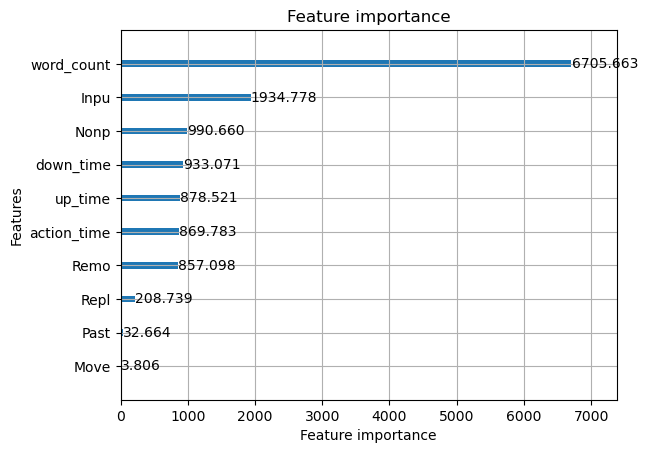

In [34]:
lgbm.plot_importance(model, importance_type="gain")

## Predictions

In [49]:
df_test = pd.read_csv("test_df_v1.csv")
df_test.head()

,id,down_time,up_time,action_time,word_count,Inpu,Move,Nonp,Past,Remo,Repl
0,0000aaaa,338433,760160,172,0,2,0,0,0,0,0
1,2222bbbb,290502,712023,113,1,2,0,0,0,0,0
2,4444cccc,184996,635641,150,1,2,0,0,0,0,0


In [23]:
df_test.drop("id", axis = 1, inplace = True)

In [36]:
predicted_scores = model.predict(df_test)

In [37]:
predicted_scores

array([0.63729843, 0.63729843, 0.66275093])

In [50]:
submissions_v1 = pd.DataFrame({'id': df_test['id'], 'score':predicted_scores})

In [54]:
submissions_v1.to_csv("submission.csv", index = False)